Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

# Lab 2.1: Data Processing

In the previous lab, we stored our results as CSV, TSV, and JSON files. In this lab, we learn how to process the results with the *pandas* library. We see examples about accessing and filtering values and discuss the role of missing values for the dataset statistics. Pandas is an extremely useful library, but it can sometimes be difficult to achieve what you want.

**You should always plan in more time than you anticipate for transforming your data into the right format!** 

## 1. Read data

Pandas presents the content as a data frame (often abbreviated df). By default, the rows and columns are numbered with an index (starting at 0), but it is also possible to provide names for them. In our case, the header provides names for the columns. 

We read in the two example datasets. **Examine the structure of the data frame.**

In [3]:
import pandas as pd
import stanza 

tsv_file = "../data/veganism_overview_en.tsv"
# The separator (sep) is a tabulator, and the first line should be interpreted as the header
news_content = pd.read_csv(tsv_file, sep="\t", header = 0)

# Read in JSON 
# TODO update with Mastodon data
json_file = "../data/mastodon_results_veganism.json"
mastodon_content = pd.read_json(json_file)

# Take a look at the data
#print(news_content[:5])
print(mastodon_content[:5])

                   id                       created_at  in_reply_to_id  \
0  111252337696188720        2023-10-17 20:52:31+00:00             NaN   
1  111244982296730848 2023-10-16 13:41:59.163000+00:00             NaN   
2  111240852959194304        2023-10-15 20:11:49+00:00             NaN   
3  111239869248238304        2023-10-15 16:01:34+00:00             NaN   
4  111234265694545776        2023-10-14 16:16:35+00:00    1.112334e+17   

   in_reply_to_account_id  sensitive spoiler_text visibility language  \
0                     NaN      False                  public       en   
1                     NaN      False                  public       it   
2                     NaN      False                  public       en   
3                     NaN      False                  public       en   
4            1.093178e+17      False                  public       en   

                                                 uri  \
0  https://veganism.social/users/Dragofix/statuse...   
1  h

In [2]:
print(news_content[0:5])

  Publication Date       Time           Publisher  \
0       2020-09-15  18:20:00Z  newsindiatimes.com   
1       2020-09-15  10:02:50Z             VegNews   
2       2020-09-10  20:17:56Z            BBC News   
3       2020-09-15  13:08:32Z          Healthline   
4       2020-09-04  07:00:00Z       Green Matters   

                             Author  \
0                          Ela Dutt   
1                               NaN   
2  https://www.facebook.com/bbcnews   
3            Lauren Panoff, MPH, RD   
4                            sophie   

                                               Title  \
0                    Veganism: From fad to lifestyle   
1  Interest in Veganism Hits All-Time High in 202...   
2    Why black Americans are more likely to be vegan   
3                                  Is Beeswax Vegan?   
4  Opinion: Miley Cyrus Says She's No Longer Vega...   

                                                 URL  \
0  https://www.newsindiatimes.com/veganism-from-f... 

In [4]:
news_content.size

336

In [5]:
news_content.shape

(48, 7)

**What do size and shape indicate?**

## 2. Accessing values 

We often only want to perform operations on a subset of the data without deleting the rest. We can access the data using the index (with *iloc*) or the names (with *loc*). If you leave out the indicator for the column, the whole row is displayed. If you want to show all rows, use the : symbol. This is generally used to indicate the full range of a list. 

We only provide a few examples, but **it is important to practice different ways to access the data that you are interested in.**

In [6]:
# Get row 5, column 2
news_content.iloc[5,2]

# If you add additional brackets, the output looks nicer:
#news_content.iloc[[5],[2]]

'IrishCentral'

In [7]:
# Get the column "Title" from row 5 
news_content.loc[5,"Title"]

'Ireland ranked among top ten countries globally for veganism'

In [8]:
# Get row 3 
# news_content.loc[3]

# Nicer formatting
news_content.iloc[[3]]

,Publication Date,Time,Publisher,Author,Title,URL,Text
3,2020-09-15,13:08:32Z,Healthline,"Lauren Panoff, MPH, RD",Is Beeswax Vegan?,https://www.healthline.com/nutrition/is-beeswa...,A vegan diet is defined as a way of eating tha...


In [9]:
# Get the 2nd column from all rows 
news_content.iloc[:,2]

0           newsindiatimes.com
1                      VegNews
2                     BBC News
3                   Healthline
4                Green Matters
5                 IrishCentral
6           BBC Focus Magazine
7                Deccan Herald
8            Green Queen Media
9                     Euronews
10             Cherwell Online
11            Plant Based News
12         Daily Trojan Online
13           Green Queen Media
14          New Zealand Herald
15            USA Today 10Best
16                    The Beet
17            Plant Based News
18            Plant Based News
19          The Jerusalem Post
20                  Civil Eats
21               Las Vegas Sun
22                    Euronews
23        Eco Warrior Princess
24                  Grit Daily
25            Plant Based News
26                    The Beet
27          Totally Vegan Buzz
28               Yahoo Finance
29               The New Daily
30            Plant Based News
31              Times of India
32    So

## 3. Accessing columns

We often want to access the columns of a data frame. We can do that by using the name of the column. 

Sometimes, we just want to work with a subset of the dataset. We can indicate which columns to keep in a list. 

In [9]:
# Different ways of accessing columns
# news_content["Title"]
# news_content["Title"][3:8]

content_subset = news_content[["Publisher","Author","Title"]]
print(content_subset[0:3])

            Publisher                            Author  \
0  newsindiatimes.com                          Ela Dutt   
1             VegNews                               NaN   
2            BBC News  https://www.facebook.com/bbcnews   

                                               Title  
0                    Veganism: From fad to lifestyle  
1  Interest in Veganism Hits All-Time High in 202...  
2    Why black Americans are more likely to be vegan  


## 4. Filtering

A very powerful tool is the option to filter a pandas dataframe using boolean values. 

**Make sure you understand the difference between step 1 and 2 by trying different conditions and outputting the results.** 

In [10]:
# Filter by Date
# 1. This statement returns a data frame with boolean values indicating whether the row fulfills the condition
is_september15 = news_content["Publication Date"] == "2020-09-15"


# 2. We can filter our data frame with the boolean data frame. 
september15_extract = news_content[news_content["Publication Date"] == "2020-09-15"]
#september15_extract = news_content[is_september15]

september15_extract

,Publication Date,Time,Publisher,Author,Title,URL,Text
0,2020-09-15,18:20:00Z,newsindiatimes.com,Ela Dutt,Veganism: From fad to lifestyle,https://www.newsindiatimes.com/veganism-from-f...,"Thirty years ago, a few Indian-Americans got t..."
1,2020-09-15,10:02:50Z,VegNews,NaN,Interest in Veganism Hits All-Time High in 202...,https://vegnews.com/2020/9/interest-in-veganis...,"September 15, 2020 Interest in veganism has h..."
3,2020-09-15,13:08:32Z,Healthline,"Lauren Panoff, MPH, RD",Is Beeswax Vegan?,https://www.healthline.com/nutrition/is-beeswa...,A vegan diet is defined as a way of eating tha...
9,2020-09-15,15:35:54Z,Euronews,Marthe de Ferrer,Live lamb used in provocative new vegan commer...,https://www.euronews.com/living/2020/09/15/liv...,The first ever pro-vegan commercial has been b...
21,2020-09-15,09:00:00Z,Las Vegas Sun,https://lasvegassun.com/staff/sara-macneil/,Group says the need to feed young Las Vegans '...,https://lasvegassun.com/news/2020/sep/15/group...,Volunteers inventory donated food at the Servi...
33,2020-09-15,17:20:36Z,Mic,By Melissa Pandika,"Meet Genesis Butler, the 13-year-old activist ...",https://www.mic.com/p/meet-genesis-butler-the-...,While much of the country took up tie-dye and ...
36,2020-09-15,13:08:32Z,Healthline,"Alina Petre, MS, RD (NL)",Incomplete Protein: Is It a Concern?,https://www.healthline.com/nutrition/incomplet...,Plant-based sources of protein are often deeme...
41,2020-09-15,04:03:40Z,Soapbox Cincinnati,"Lauren Caggiano |Tuesday, September 15, 2020",This Black-owned business is bringing vegan tr...,https://www.soapboxmedia.com/devnews/Like-Moms...,"When it comes to a niche, a Cincinnati-based p..."


We provide examples for conditioning on substrings or numbers. **Try out other filters.**

You can create complex filters by combining different conditions. Keep in mind that your code should be readable (also for yourself!). Sometimes it is clearer if you apply simple filters in two steps than combining them into one complex step.   

In [11]:
# Search for substrings
is_question = news_content[news_content["Title"].str.contains("?", regex = False)]
contains_number = news_content[news_content["Title"].str.contains("[0-9]", regex = True)]
contains_number


,Publication Date,Time,Publisher,Author,Title,URL,Text
1,2020-09-15,10:02:50Z,VegNews,NaN,Interest in Veganism Hits All-Time High in 202...,https://vegnews.com/2020/9/interest-in-veganis...,"September 15, 2020 Interest in veganism has h..."
6,2020-09-13,07:00:00Z,BBC Focus Magazine,By Amy Barrett,Global veganism could undo 16 years’ of fossil...,https://www.sciencefocus.com/news/global-vegan...,Going vegan could free up 7 million square kil...
8,2020-09-08,05:47:36Z,Green Queen Media,NaN,6 Reasons Why Miley Cyrus Is Wrong About Veganism,https://www.greenqueen.com.hk/6-reasons-why-mi...,NaN
11,2020-09-02,07:00:00Z,Plant Based News,Maria Chiorando,Top 10 Countries Where Veganism Is Most Popula...,https://www.plantbasednews.org/lifestyle/top-1...,Switzerland was number 8 on the list (Photo: A...
13,2020-09-03,07:00:00Z,Green Queen Media,NaN,Revealed: The 5 Biggest Misconceptions About V...,https://www.greenqueen.com.hk/revealed-the-5-b...,NaN
19,2020-09-08,16:36:55Z,The Jerusalem Post,NaN,Israel ranks 3rd on list of 2020's most popula...,https://www.jpost.com/israel-news/israel-ranks...,NaN
25,2020-09-04,10:54:19Z,Plant Based News,Maria Chiorando,New Research Reveals Top 10 Cities Where Vegan...,https://www.plantbasednews.org/lifestyle/-top-...,Edinburgh took the third spot on the list (Pho...
26,2020-08-25,13:55:13Z,The Beet,hwelch,What You Can Learn From 20 Athletes Who Went V...,https://thebeet.com/what-you-can-learn-from-20...,"Now more than ever, athletes are reaching for ..."
27,2020-09-10,09:52:20Z,Totally Vegan Buzz,Posted byTotally Vegan Buzz Team,UK and Australia top the list of 2020's most p...,https://www.totallyveganbuzz.com/news/uk-austr...,NaN
28,2020-09-16,07:48:00Z,Yahoo Finance,NaN,"North America Potato Protein Markets, 2020-202...",https://finance.yahoo.com/news/north-america-p...,"Dublin, Sept. 16, 2020 (GLOBE NEWSWIRE) -- The..."


In [13]:
# Evaluate numbers
popular = mastodon_content[mastodon_content["favourites_count"] > 3]
popular

,id,created_at,in_reply_to_id,in_reply_to_account_id,sensitive,spoiler_text,visibility,language,uri,url,...,content,reblog,account,media_attachments,mentions,tags,emojis,card,poll,application
8,111222080260194656,2023-10-12 12:37:41.786000+00:00,NaN,NaN,False,,public,nl,https://mastodon.social/users/itsveganjim/stat...,https://mastodon.social/@itsveganjim/111222080...,...,"<p><a href=""https://mastodon.social/tags/vegan...",NaN,"{'id': '108431110488823039', 'username': 'itsv...","[{'id': '111222078427623584', 'type': 'image',...",[],"[{'name': 'vegan', 'url': 'https://mastodon.so...",[],None,NaN,"{'name': 'Toot!', 'website': 'https://toot.c3...."
16,111201108271014352,2023-10-08 19:44:10+00:00,NaN,NaN,False,,public,en,https://veganism.social/users/utopify_org/stat...,https://veganism.social/@utopify_org/111201107...,...,"<p>People: ""Where do you get your proteins?""<b...",NaN,"{'id': '110526934243778651', 'username': 'utop...","[{'id': '111201108146552714', 'type': 'image',...",[],"[{'name': 'vegan', 'url': 'https://mastodon.so...",[],None,NaN,NaN
19,111194176101875984,2023-10-07 14:21:18.126000+00:00,1.111941e+17,1.092587e+17,False,,public,en,https://mastodon.social/users/catrionagold/sta...,https://mastodon.social/@catrionagold/11119417...,...,"<p>In <a href=""https://mastodon.social/tags/Br...",NaN,"{'id': '109258696454625120', 'username': 'catr...",[],[],"[{'name': 'brazil', 'url': 'https://mastodon.s...",[],None,NaN,NaN


## 5. Basic statistics

The function *describe* provides basic statistics about the data frame. 

**Try to interpret the output. What do top and freq refer to? Are the categories meaningful for text data? Can you trust that there are no duplicates if count and unique are equal?**

In [14]:
news_content.describe()

,Publication Date,Time,Publisher,Author,Title,URL,Text
count,48,48,48,30,48,48,34
unique,20,34,36,24,48,48,34
top,2020-09-15,07:00:00Z,Plant Based News,Maria Chiorando,Veganism: From fad to lifestyle,https://www.newsindiatimes.com/veganism-from-f...,"Thirty years ago, a few Indian-Americans got t..."
freq,8,14,5,4,1,1,1


In [15]:
mastodon_content.describe()

,id,in_reply_to_id,in_reply_to_account_id,replies_count,reblogs_count,favourites_count,reblog,poll
count,2.000000e+01,3.000000e+00,3.000000e+00,20.000000,20.000000,20.000000,0.0,0.0
mean,1.112184e+17,1.111980e+17,1.098985e+17,0.350000,2.800000,1.050000,NaN,NaN
std,1.706187e+13,3.366432e+13,1.057476e+15,0.587143,2.984169,1.669384,NaN,NaN
min,1.111942e+17,1.111664e+17,1.092587e+17,0.000000,0.000000,0.000000,NaN,NaN
25%,1.112049e+17,1.111803e+17,1.092882e+17,0.000000,0.750000,0.000000,NaN,NaN
50%,1.112157e+17,1.111941e+17,1.093178e+17,0.000000,1.500000,0.000000,NaN,NaN
75%,1.112266e+17,1.112138e+17,1.102184e+17,1.000000,5.000000,2.000000,NaN,NaN
max,1.112523e+17,1.112334e+17,1.111191e+17,2.000000,10.000000,5.000000,NaN,NaN


## 6. Own statistics

For language data, you might want to calculate your own statistics which are more meaningful. The code below iterates through the titles and keeps track of the number of characters. 


In [16]:
lengths = []

# Only iterate through the titles
for title in news_content["Title"]:
    lengths.append(len(title))
    
mean = sum(lengths)/len(lengths)
print("Mean length of titles: ") 
print(mean)


Mean length of titles: 
60.0625


If you calculate the mean, you should also have a look at the median, the mode, the standard deviation, the variance, and the min and max values. Have a look at the [*statistics* module](https://docs.python.org/3/library/statistics.html) to refresh your knowledge on these metrics.
**Do you have an idea how to calculate the length of the title in words?**


In [17]:
import statistics

mean = statistics.mean(lengths)
std = statistics.stdev(lengths)
median = statistics.median(lengths)
mode = statistics.mode(lengths)
variance = statistics.variance(lengths)
min_length = min(lengths)
max_length = max(lengths)

two_decimals = ["%.2f" % v for v in [mean, median, mode, std, variance, min_length, max_length]]
print("mean, std, median, variance, min, max")
print(two_decimals) 

mean, std, median, variance, min, max
['60.06', '60.50', '75.00', '21.08', '444.23', '17.00', '115.00']


## 7. Plot distributions

It is always more informative to look at the distribution of a variable instead of aggregate statistics. This can be done using the module *matplotlib*. 

**What kind of information can you derive from the plot? How can you identify outliers?**


[31, 75, 47, 17, 115, 60, 61, 18, 49, 69, 46, 72, 42, 53, 49, 52, 53, 75, 84, 68, 50, 79, 75, 33, 77, 65, 66, 73, 113, 87, 47, 38, 62, 75, 64, 26, 36, 47, 59, 56, 75, 86, 71, 44, 47, 84, 74, 38]


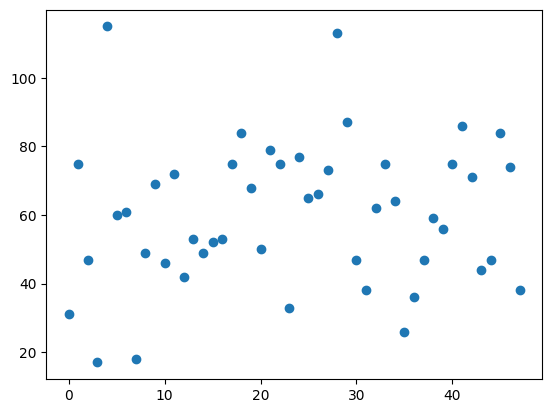

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

print(lengths)
# We simply enumerate the titles, 0 refers to the first title in our dataframe
title_ids = [i for i in range(len(news_content["Title"]))]
plt.plot(title_ids,lengths,'o')

## 8. Dealing with missing data 

You can see that the value NaN occurs quite often. This stands for *Not A Number* and is interpreted as a float. Pandas automatically interprets empty cells as NaN when reading in data. If you do not notice that, it can lead to annoying errors or wrong interpretations. If one value in a column is NaN, the mean and standard deviation will also be NaN. 
One way to deal with the NaN problem is to simply replace them with a default value. In the following example, we replace all NaN values with 0. 

In [23]:
mastodon_content_modified = mastodon_content.fillna(0)
mastodon_content_modified.describe()

,id,in_reply_to_id,in_reply_to_account_id,replies_count,reblogs_count,favourites_count,reblog,poll
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.0,20.0
mean,1.112184e+17,1.667970e+16,1.648478e+16,0.350000,2.800000,1.050000,0.0,0.0
std,1.706187e+13,4.073711e+16,4.026251e+16,0.587143,2.984169,1.669384,0.0,0.0
min,1.111942e+17,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0
25%,1.112049e+17,0.000000e+00,0.000000e+00,0.000000,0.750000,0.000000,0.0,0.0
50%,1.112157e+17,0.000000e+00,0.000000e+00,0.000000,1.500000,0.000000,0.0,0.0
75%,1.112266e+17,0.000000e+00,0.000000e+00,1.000000,5.000000,2.000000,0.0,0.0
max,1.112523e+17,1.112334e+17,1.111191e+17,2.000000,10.000000,5.000000,0.0,0.0


The NaN problem is particularly difficult when we work with String values. Recall that we did not find information about the author for many articles. (Counters were introduced in [chapter 10](https://github.com/cltl/python-for-text-analysis/blob/master/Chapters/Chapter%2010%20-%20Dictionaries.ipynb) of the python course.)

In [24]:
from collections import Counter

authors = news_content["Author"]

# Count how often each author occurs
frequencies = Counter(authors)

print(frequencies)

Counter({nan: 18, 'Maria Chiorando': 4, 'sophie': 2, 'Marthe de Ferrer': 2, 'Alina Petre, MS, RD (NL)': 2, 'Ela Dutt': 1, 'https://www.facebook.com/bbcnews': 1, 'Lauren Panoff, MPH, RD': 1, 'By Amy Barrett': 1, 'MONTANA DENTON': 1, 'NZ Herald        Share via email  Share on Facebook  Share on Twitter  Show more  Bookmark this article     Share on Facebook facebook    Share on Twitter twitter    Share via email email    Share on LinkedIn linkedin    Share on Google Plus google-plus    Share on Whatsapp whatsapp    Share on Pinterest pinterest    Share on Reddit reddit': 1, 'smcclain': 1, 'Louisa Kendal at Viva!': 1, 'https://lasvegassun.com/staff/sara-macneil/': 1, 'hwelch': 1, 'Posted byTotally Vegan Buzz Team': 1, 'DPA': 1, 'By Melissa Pandika': 1, 'Ashok Selvam': 1, 'miriamporter': 1, 'April Lisante': 1, 'Lauren Caggiano |Tuesday, September 15, 2020': 1, 'Karen Hardy': 1, 'By Carrie Dennett': 1, 'https://lasvegasweekly.com/staff/ray-brewer/': 1})


**Note**: If we now want to sort the authors by name, we get a *Type Error* because NaN is interpreted as a float and not a string. Below, we decide to replace it with a default string: "Unknown" using the function *fillna*.

**For the reproducibility of your analyses, it is very important to be transparent about the handling of missing data. More options can be found in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).**  

In [26]:
# Sort the authors by name.
sorted_by_name = sorted(frequencies.items(), key=lambda item: item[0])

print(sorted_by_name)

TypeError: '<' not supported between instances of 'float' and 'str'

In [22]:
# We replace NaN with the default string "Unknown"
modified_authors = authors.fillna("Unknown")

# Count how often each author occurs
frequencies = Counter(modified_authors)
sorted_by_name = sorted(frequencies.items(), key=lambda item: item[0])
sorted_by_frequency = sorted(frequencies.items(), key=lambda item: item[1])
print(sorted_by_name)

[('Alina Petre, MS, RD (NL)', 2), ('April Lisante', 1), ('Ashok Selvam', 1), ('By Amy Barrett', 1), ('By Carrie Dennett', 1), ('By Melissa Pandika', 1), ('DPA', 1), ('Ela Dutt', 1), ('Karen Hardy', 1), ('Lauren Caggiano |Tuesday, September 15, 2020', 1), ('Lauren Panoff, MPH, RD', 1), ('Louisa Kendal at Viva!', 1), ('MONTANA DENTON', 1), ('Maria Chiorando', 4), ('Marthe de Ferrer', 2), ('NZ Herald        Share via email  Share on Facebook  Share on Twitter  Show more  Bookmark this article     Share on Facebook facebook    Share on Twitter twitter    Share via email email    Share on LinkedIn linkedin    Share on Google Plus google-plus    Share on Whatsapp whatsapp    Share on Pinterest pinterest    Share on Reddit reddit', 1), ('Posted byTotally Vegan Buzz Team', 1), ('Unknown', 18), ('https://lasvegassun.com/staff/sara-macneil/', 1), ('https://lasvegasweekly.com/staff/ray-brewer/', 1), ('https://www.facebook.com/bbcnews', 1), ('hwelch', 1), ('miriamporter', 1), ('smcclain', 1), ('so

Another option is to set the parameter keep_default_na in pd.read_csv() to False. This ensures that empty strings are not interpreted as NaN. Make sure to check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).